# Cohort Analysis

A cohort analysis é uma ferramenta analítica descritiva. 

Ela agrupa os clientes em grupos mutuamente exclusivos - que são medidos ao longo do tempo. A análise de cohort fornece insights mais profundos do que as chamadas métricas de vaidade. Ajuda a compreender melhor as tendências de alto nível, fornecendo insights sobre as métricas do produto e do ciclo de vida do cliente.


Existem três tipos principais de analises cohort. As cohorts de tempo são clientes que se inscreveram em um produto ou serviço durante um determinado período. Ela mostra o comportamento dos clientes dependendo do momento em que eles começaram a usar os produtos ou serviços da empresa. O tempo pode ser mensal ou trimestral, até mesmo diário. Cohorts de comportamento são clientes que compraram um produto ou assinaram um serviço no passado. 

Ele agrupa os clientes pelo tipo de produto ou serviço que eles assinaram. Os clientes que se inscreveram para serviços de nível básico podem ter necessidades diferentes daqueles que se inscreveram para serviços avançados. Compreender as necessidades das várias coortes pode ajudar uma empresa a projetar serviços ou produtos sob medida para segmentos específicos. Os coortes de tamanho referem-se aos vários tamanhos de clientes que compram produtos ou serviços da empresa. 

Essa categorização pode ser baseada na quantidade de gastos em algum período de tempo após a aquisição ou no tipo de produto em que o cliente gastou a maior parte do valor do pedido em algum período de tempo. Agora, vamos examinar os principais elementos da análise de coorte.



## Read Data

In [1]:
import pandas as pd
import datetime as dt

In [2]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [3]:
def get_day(x): return dt.datetime(x.year, x.month, x.day)

In [4]:
online = pd.read_csv('online.csv',';')

In [5]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [6]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [7]:
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day)
grouping = online.groupby('CustomerID')['InvoiceDay']
online['CohortDay'] = grouping.transform('min')

In [8]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-25
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-01-11
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-06-12
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-11


## Cohort Dataframe

In [9]:
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay') 
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

days_diff = invoice_day - cohort_day

#online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-25,1
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-01-11,11
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-06-12,6
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-11,4


In [10]:
grouping = online.groupby(['CohortDay','CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_counts = cohort_data.pivot(index = 'CohortDay',
                                 columns = 'CohortIndex',
                                 values = 'CustomerID')

In [11]:
print(cohort_counts)

CohortIndex    1    2    3    4    5    6     7     8     9     10  ...    15  \
CohortDay                                                           ...         
2010-01-12   69.0  3.0  1.0  NaN  3.0  5.0   2.0   4.0   4.0   2.0  ...  22.0   
2010-02-12   78.0  NaN  NaN  NaN  1.0  3.0   2.0   4.0   3.0   NaN  ...  28.0   
2010-03-12   30.0  NaN  1.0  1.0  NaN  NaN   1.0   NaN   NaN   7.0  ...  12.0   
2010-05-12   59.0  3.0  2.0  1.0  4.0  2.0   NaN  21.0  29.0  19.0  ...  22.0   
2010-06-12   57.0  NaN  2.0  1.0  1.0  NaN  17.0  19.0  17.0  15.0  ...  20.0   
...           ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...   ...   
2011-12-05    7.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
2011-12-06    1.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
2011-12-08    2.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
2011-12-09    6.0  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
2011-12-10    5.0  NaN  NaN 

## Cohort Metrics

In [12]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-01-12,100.0,4.3,1.4,NaN,4.3,7.2,2.9,5.8,5.8,2.9,...,31.9,33.3,33.3,33.3,27.5,33.3,33.3,37.7,34.8,15.9
2010-02-12,100.0,NaN,NaN,NaN,1.3,3.8,2.6,5.1,3.8,NaN,...,35.9,35.9,32.1,38.5,28.2,33.3,37.2,47.4,14.1,NaN
2010-03-12,100.0,NaN,3.3,3.3,NaN,NaN,3.3,NaN,NaN,23.3,...,40.0,30.0,30.0,26.7,13.3,36.7,33.3,3.3,NaN,NaN
2010-05-12,100.0,5.1,3.4,1.7,6.8,3.4,NaN,35.6,49.2,32.2,...,37.3,47.5,44.1,49.2,55.9,25.4,NaN,NaN,NaN,NaN
2010-06-12,100.0,NaN,3.5,1.8,1.8,NaN,29.8,33.3,29.8,26.3,...,35.1,38.6,36.8,45.6,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-06,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-08,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#grouping = online.groupby(['CohortDay', 'CohortIndex']) 

cohort_data = grouping['UnitPrice'].mean()
cohort_data = cohort_data.reset_index()

average_price = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='UnitPrice')
print(average_price.round(1))

CohortIndex   1    2    3    4    5    6    7    8    9    10  ...    15   16  \
CohortDay                                                      ...              
2010-01-12   3.0  2.6  5.5  NaN  2.4  2.8  3.0  3.7  3.0  2.6  ...  39.2  2.6   
2010-02-12   3.0  NaN  NaN  NaN  1.7  2.8  2.5  4.8  3.7  NaN  ...   2.7  3.2   
2010-03-12   3.3  NaN  1.9  3.0  NaN  NaN  2.9  NaN  NaN  3.1  ...   3.1  2.6   
2010-05-12   2.7  2.3  2.2  2.0  4.6  2.8  NaN  3.2  2.7  2.7  ...   2.9  3.0   
2010-06-12   2.7  NaN  1.7  1.9  4.3  NaN  3.7  2.2  2.3  2.6  ...   3.1  3.0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
2011-12-05   3.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
2011-12-06   2.1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
2011-12-08   4.3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
2011-12-09   2.6  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN  NaN   
2011-12-10   3.0  NaN  NaN  

## Visualize Data

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

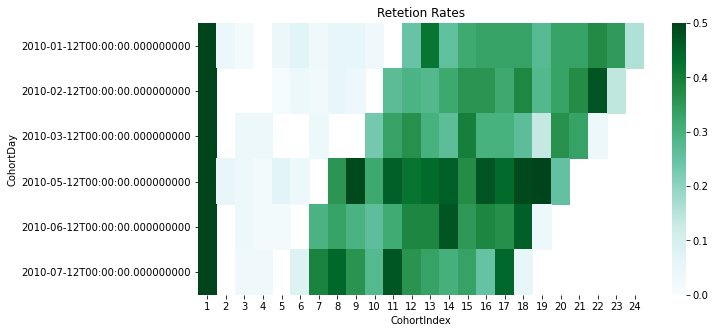

In [19]:
plt.figure(figsize=(10,5))
plt.title('Retetion Rates')
sns.heatmap(data=retention[0:6], fmt='0.%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()